In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import filtfilt

%matplotlib notebook
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import numpy as np


df = pd.read_csv('Data set N1/Raw_gait_data_N1 set.csv')

time = df.loc[:,"TIME"]

ankle_x= df.loc[:,"RIGHT ANKLE X"]
ankle_y= df.loc[:,"RIGHT ANKLE Y"]

knee_x= df.loc[:,"Right knee X"]
knee_y= df.loc[:,"Right knee Y"]

hip_x= df.loc[:,"Right hip X"]
hip_y= df.loc[:,"Right hip Y"]
#k1=df.plot(x="TIME",y="RIGHT ANKLE X")
#k2=df.plot(x="TIME",y="RIGHT ANKLE Y")

n = 3# the larger n is, the smoother curve will be 
b = [1.0 / n] * n 
a = 1 

ankle_y_filt = filtfilt(b,a,ankle_y) 
ankle_x_filt = filtfilt(b,a,ankle_x) 

knee_y_filt = filtfilt(b,a,knee_y) 
knee_x_filt = filtfilt(b,a,knee_x) 

hip_y_filt = filtfilt(b,a,hip_y) 
hip_x_filt = filtfilt(b,a,hip_x) 

#new_ankle_y=plt.plot(time,ankle_y_filt, linewidth=2, linestyle="-", c="b")
#new_ankle_x=plt.plot(time,ankle_x_filt, linewidth=2, linestyle="-", c="b")
#new_knee_y=plt.plot(time,knee_y_filt, linewidth=2, linestyle="-", c="b")
#new_knee_x=plt.plot(time,knee_x_filt, linewidth=2, linestyle="-", c="b")
#new_hip_y=plt.plot(time,hip_y_filt, linewidth=2, linestyle="-", c="b")
#new_hip_x=plt.plot(time,hip_x_filt, linewidth=2, linestyle="-", c="b")

In [ ]:
fig1=plt.figure()
plt.axes(xlim=(0,275),ylim=(8,90))

pt1, = plt.plot(ankle_x_filt[0], ankle_y_filt[0], 'ro')
pt2, = plt.plot(knee_x_filt[0], knee_y_filt[0], 'ro')
pt3, = plt.plot(hip_x_filt[0], hip_y_filt[0], 'ro')
link1,= plt.plot([hip_x_filt[0], knee_x_filt[0] ],[hip_y_filt[0], knee_y_filt[0]],'bo-',animated=True)
link2,= plt.plot([knee_x_filt[0], ankle_x_filt[0] ],[knee_y_filt[0], ankle_y_filt[0]],'bo-',animated=True)

def init1():
    pt1.set_data(ankle_x_filt[0], ankle_y_filt[0])
    return pt1,

def init2():
    pt2.set_data(knee_x_filt[0], knee_y_filt[0])
    return pt2,

def init3():
    pt3.set_data(hip_x_filt[0], hip_y_filt[0])
    return pt3,

def init4():
    link1.set_data([hip_x_filt[0], knee_x_filt[0]],[hip_y_filt[0], knee_y_filt[0]])
    return link1,

def animate1(i):
    x=ankle_x_filt[i]
    y=ankle_y_filt[i]
    pt1.set_data(x,y)
    return pt1,

def animate2(i):
    x=knee_x_filt[i]
    y=knee_y_filt[i]
    pt2.set_data(x,y)
    return pt2,

def animate3(i):
    x=hip_x_filt[i]
    y=hip_y_filt[i]
    pt3.set_data(x,y)
    return pt3,

def animate4(i):
    x1=hip_x_filt[i]
    y1=hip_y_filt[i]
    x2=knee_x_filt[i]
    y2=knee_y_filt[i]
    link1.set_data([x1,x2],[y1,y2])
    return link1,

anim1 = animation.FuncAnimation(fig1, animate1, init_func=init1, frames=106, interval=100, blit=True)
anim2 = animation.FuncAnimation(fig1, animate2, init_func=init2, frames=106, interval=100, blit=True)
anim3 = animation.FuncAnimation(fig1, animate3, init_func=init3, frames=106, interval=100, blit=True)
anim4 = animation.FuncAnimation(fig1, animate4, init_func=init4, frames=106, interval=100, blit=True)

plt.show()

In [ ]:
new_ankle=plt.plot(ankle_x_filt,ankle_y_filt, linewidth=2, linestyle="-", c="b")
new_knee=plt.plot(knee_x_filt,knee_y_filt, linewidth=2, linestyle="-", c="b")
new_hip=plt.plot(hip_x_filt,hip_y_filt, linewidth=2, linestyle="-", c="b")

In [ ]:
fig1=plt.figure()
plt.axes(xlim=(0,275),ylim=(8,90))

link1,= plt.plot([hip_x_filt[0], knee_x_filt[0]],[hip_y_filt[0], knee_y_filt[0]],'bo-',animated=True)
link2,= plt.plot([knee_x_filt[0], ankle_x_filt[0]],[knee_y_filt[0], ankle_y_filt[0]],'bo-',animated=True)

def init4():
    link1.set_data([hip_x_filt[0], knee_x_filt[0]],[hip_y_filt[0], knee_y_filt[0]])
    return link1,

def animate4(i):
    x1=hip_x_filt[i]
    y1=hip_y_filt[i]
    x2=knee_x_filt[i]
    y2=knee_y_filt[i]
    link1.set_data([x1,x2],[y1,y2])
    return link1,

def init5():
    link2.set_data([knee_x_filt[0],ankle_x_filt[0]],[knee_y_filt[0], ankle_y_filt[0]])
    return link2,

def animate5(i):
    x1=knee_x_filt[i]
    y1=knee_y_filt[i]
    x2=ankle_x_filt[i]
    y2=ankle_y_filt[i]
    link2.set_data([x1,x2],[y1,y2])
    return link2,


anim4 = animation.FuncAnimation(fig1, animate4, init_func=init4, frames=106, interval=100, blit=True)
anim5 = animation.FuncAnimation(fig1, animate5, init_func=init5, frames=106, interval=100, blit=True)

plt.show()

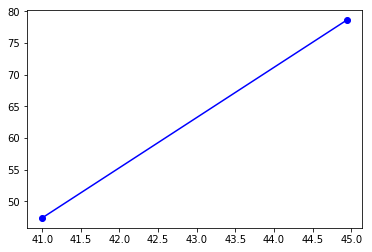

In [2]:
plt.plot([hip_x_filt[0], knee_x_filt[0]],[hip_y_filt[0], knee_y_filt[0]],'bo-')
plt.show()

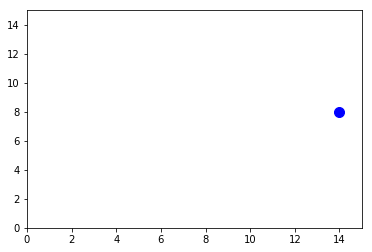

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

list_var_points = (1, 5, 4, 9, 8, 2, 6, 5, 2, 1, 9, 7, 10)

fig, ax = plt.subplots()
xfixdata, yfixdata = 14, 8
xdata, ydata = 5, None
ln, = plt.plot([], [], 'ro-', animated=True)
plt.plot([xfixdata], [yfixdata], 'bo', ms=10)

def init():
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 15)
    return ln,

def update(frame):
    ydata = list_var_points[frame]
    ln.set_data([xfixdata,xdata], [yfixdata,ydata])
    return ln,          


ani = FuncAnimation(fig, update, frames=range(len(list_var_points)),
            init_func=init, blit=True)
plt.show()